<a href="https://colab.research.google.com/github/Suryaanugrah2001/Analisis-Keterlibatan-Pengguna-TikTok/blob/main/Analisis_Keterlibatan_Pengguna_TikTok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
from google.colab import files
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/tiktok.csv")
data

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(19382, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [8]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [9]:
# Periksa Missing Value
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [10]:
# Buang baris missing value
data = data.dropna(axis=0)

In [11]:
data

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0
19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0
19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0
19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0


In [12]:
# Periksa data sama
data.duplicated().sum()

0

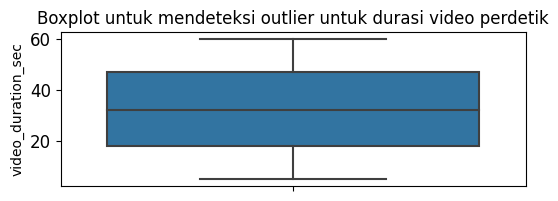

In [15]:
# Buat boxplot untuk memvisualisasikan distribusi `video durasi perdetik`
plt.figure(figsize=(6,2))
plt.title('Boxplot untuk mendeteksi outlier untuk durasi video perdetik', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(y=data['video_duration_sec'])
plt.show()

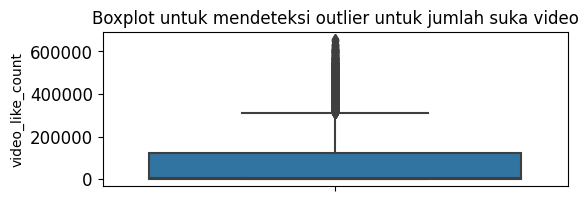

In [21]:
plt.figure(figsize=(6,2))
plt.title('Boxplot untuk mendeteksi outlier untuk jumlah suka video', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(y=data['video_like_count'])
plt.show()

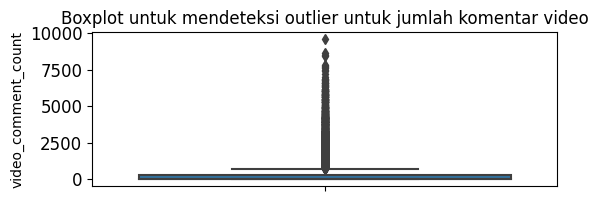

In [20]:
plt.figure(figsize=(6,2))
plt.title('Boxplot untuk mendeteksi outlier untuk jumlah komentar video', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(y=data['video_comment_count'])
plt.show()

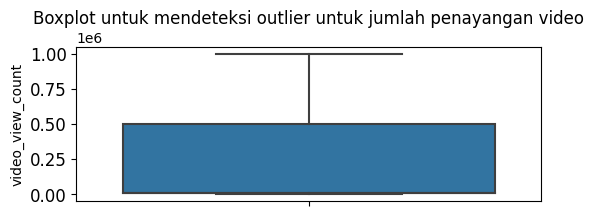

In [22]:
plt.figure(figsize=(6,2))
plt.title('Boxplot untuk mendeteksi outlier untuk jumlah penayangan video', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(y=data['video_view_count'])
plt.show()

In [23]:
# Periksa dan tangani outlier

percentile25 = data["video_like_count"].quantile(0.25)
percentile75 = data["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

In [24]:
percentile25 = data["video_comment_count"].quantile(0.25)
percentile75 = data["video_comment_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

In [26]:
# Periksa keseimbangan kelas
data["verified_status"].value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

Sekitar **93,7%** dari kumpulan data mewakili video yang diposting oleh akun yang belum terverifikasi dan **6,3%** mewakili video yang diposting oleh akun terverifikasi. Jadi variabel hasilnya tidak terlalu seimbang.

Saya akan menggunakan resampling untuk membuat keseimbangan kelas dalam variabel hasil

In [28]:
# Identifikasi data dari kelas mayoritas dan minoritas
data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

# Ambil contoh kelas minoritas (yang "terverifikasi")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # untuk mengambil sampel dengan penggantinya
                                 n_samples=len(data_majority), # untuk mencocokkan kelas mayoritas
                                 random_state=0)               # untuk mendapatkan hasil yang dapat direproduksi

# Gabungkan kelas mayoritas dengan kelas minoritas yang diambil sampelnya
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

#  jumlah kelas baru
data_upsampled["verified_status"].value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

In [29]:
# Dapatkan rata-rata panjang `teks_transkripsi_video` untuk klaim dan rata-rata panjang `teks_transkripsi_video` untuk opini
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


dengan mengekstrak panjang setiap video_transcription_text dan menambahkannya sebagai kolom ke kerangka data, sehingga dapat digunakan sebagai fitur potensial dalam mode

In [30]:
# Ekstrak panjang setiap `video_transcription_text` dan tambahkan ini sebagai kolom ke kerangka dat
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))

In [31]:
# Tampilkan beberapa baris pertama kerangka data setelah menambahkan kolom baru
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


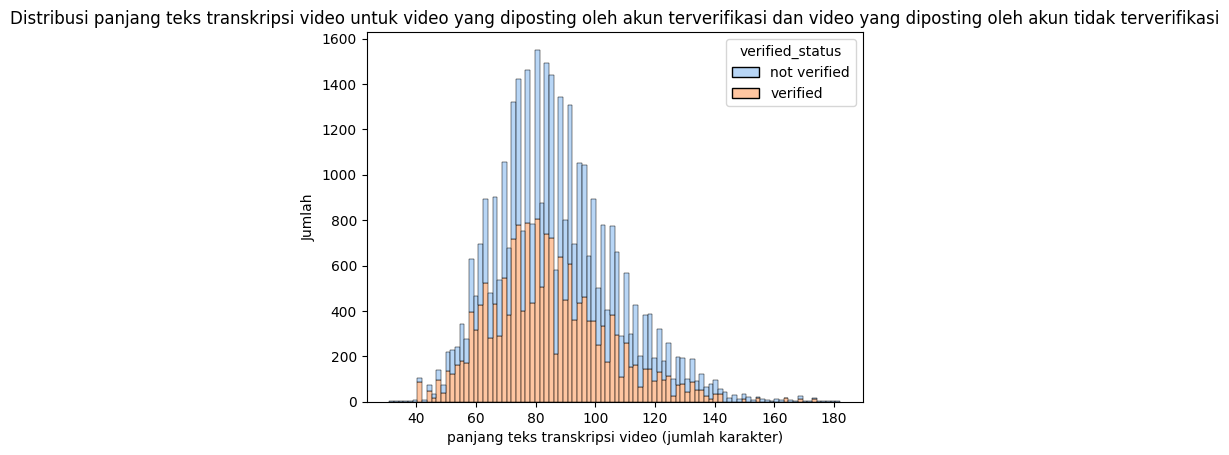

In [32]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts

sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel",
             hue="verified_status", element="bars", legend=True)
plt.title("Histogram Seaborn")
plt.xlabel("panjang teks transkripsi video (jumlah karakter)")
plt.ylabel("Jumlah")
plt.title("Distribusi panjang teks transkripsi video untuk video yang diposting oleh akun terverifikasi dan video yang diposting oleh akun tidak terverifikasi")
plt.show()

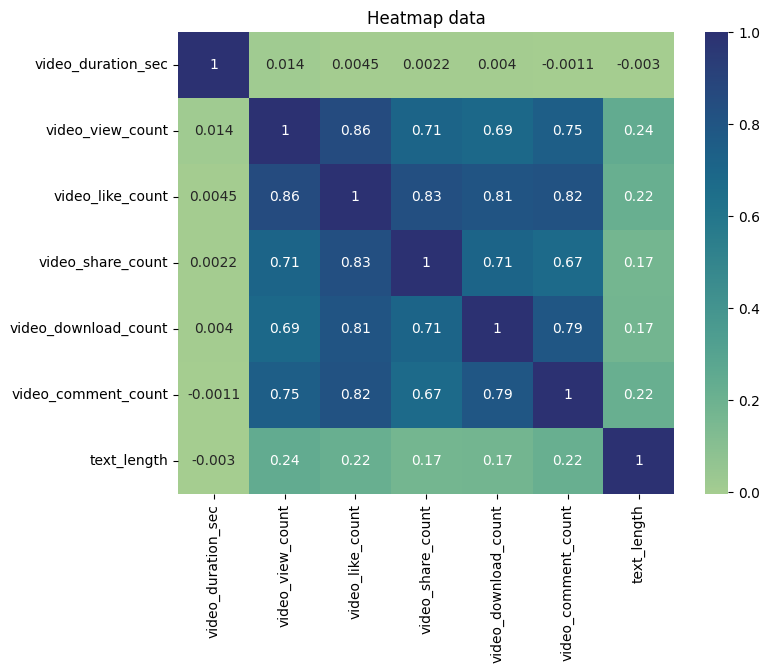

In [33]:
# Buat heatmap untuk memvisualisasikan bagaimana variabel saling berhubungan
plt.figure(figsize=(8, 6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count",
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(numeric_only=True),
    annot=True,
    cmap="crest")
plt.title("Heatmap data")
plt.show()

Dapat dilihat dari Heatmap di atas menunjukkan bahwa pasangan variabel video_view_count dan video_like_count memiliki korelasi yang kuat  dengan koefisien korelasi 0,86.

Salah satu asumsi model untuk regresi logistik adalah tidak adanya multicollinearity yang signifikan di antara fitur-fitur. dengan mempertimbangkan hal ini saat melihat heatmap dan memilih fitur-fitur mana yang akan dilanjutkan. Untuk membangun model regresi logistik yang memenuhi asumsi ini, kita bisa mengesampingkan video_like_count. Dan di antara variabel yang mengukur metrik video, dan dapat mempertahankan video_view_count, video_share_count, video_download_count, dan video_comment_count sebagai fitur-fitur.

In [34]:
# Pilih variabel hasil
y = data_upsampled["verified_status"]

# Pilih fitur
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Tampilkan beberapa data fitur
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


Kolom-kolom # dan video_id tidak dipilih sebagai fitur di sini, karena sepertinya tidak membantu dalam memprediksi apakah sebuah video menyajikan klaim atau opini. Selain itu, video_like_count tidak dipilih sebagai fitur di sini, karena itu sangat berkorelasi dengan fitur lain, seperti yang telah dibahas sebelumnya. Dan regresi logistik memiliki asumsi model no multicollinearity yang perlu dipenuhi.

In [37]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

In [38]:
# Check data
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [40]:
X_train["claim_status"].unique()


array(['opinion', 'claim'], dtype=object)

In [41]:
X_train["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

Seperti yang terlihat di atas, fitur claim_status dan author_ban_status masing-masing memiliki tipe data objek saat ini. Agar dapat bekerja dengan implementasi model melalui sklearn, fitur kategorikal ini perlu diubah menjadi bentuk numerik. Salah satu cara untuk melakukannya adalah melalui metode one-hot encoding.


In [42]:
#Pilih fitur pelatihan yang perlu
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [48]:
# Siapkan encoder untuk pengkodean one-hot fitur kategorikal
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

# menyesuaikan dan mengubah fitur pelatihan menggunakan encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [49]:
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [50]:
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [51]:
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


In [52]:
#Menggabungkan X_train dan X_train_encoded_df untuk membentuk dataframe akhir untuk data latih (X_train_final)
#Catatan: Menggunakan .reset_index(drop=True) untuk mereset indeks di X_train setelah menghapus claim_status dan author_ban_status,
#sehingga indeksnya sejajar dengan indeks pada X_train_encoded_df dan count_df
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


In [53]:
y_train.unique()

array(['verified', 'not verified'], dtype=object)

In [55]:
y_encoder = OneHotEncoder(drop='first', sparse_output=False)
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

In [56]:
# Regresi logistik model
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

In [57]:
# Pilih fitur pengujian
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [58]:
# Ubah fitur pengujian menggunakan encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [59]:
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [60]:
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.0,2.0
31748,27,5701.0,157.0,1.0,0.0
20197,31,449767.0,75385.0,5956.0,728.5
5727,19,792813.0,56597.0,5146.0,728.5
11607,54,2044.0,68.0,19.0,2.0


In [62]:
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,728.5,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


In [63]:
y_pred = log_clf.predict(X_test_final)
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

In [64]:
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

dengan mengkodekan label sebenarnya dari set pengujian sehingga dapat dibandingkan dengan prediksi.

In [65]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

In [66]:
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))




*   Jumlah fitur (8) sejajar antara set pelatihan dan set pengujian.
*   Jumlah baris sejajar antara fitur dan variabel hasil untuk pelatihan (26826) dan pengujian (8942).



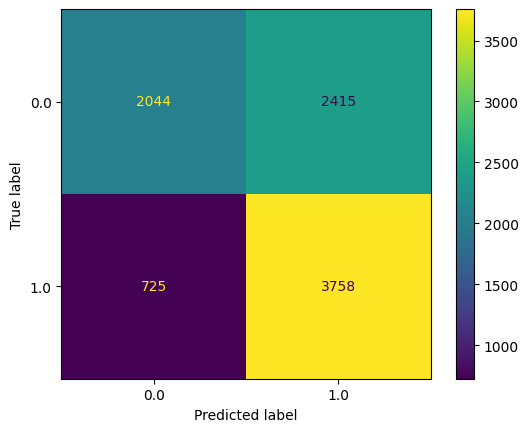

In [67]:
# Hitung nilai untuk matriks confusion
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
log_disp.plot()
plt.show()

Kuadran kiri atas menampilkan jumlah true negatives: jumlah video yang diposting oleh akun yang belum diverifikasi yang model dengan tepat mengklasifikasikan sebagai demikian.

Kuadran kanan atas menampilkan jumlah false positives: jumlah video yang diposting oleh akun yang belum diverifikasi yang model salah mengklasifikasikan sebagai diposting oleh akun yang diverifikasi.

Kuadran kiri bawah menampilkan jumlah false negatives: jumlah video yang diposting oleh akun yang diverifikasi yang model salah mengklasifikasikan sebagai diposting oleh akun yang belum diverifikasi.

Kuadran kanan bawah menampilkan jumlah true positives: jumlah video yang diposting oleh akun yang diverifikasi yang model dengan tepat mengklasifikasikan sebagai demikian.

Model yang sempurna akan menghasilkan semua true negatives dan true positives, dan tidak ada false negatives atau false positives.

In [68]:
#hitung akurasi
(3758+2044) / (3758 + 725 + 2044 + 2415)

0.6488481324088571

In [69]:
# klasifikasi untuk model regresi logistik
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.46      0.57      4459
not verified       0.61      0.84      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.64      8942
weighted avg       0.67      0.65      0.64      8942



Laporan klasifikasi di atas menunjukkan bahwa model regresi logistik mencapai presisi sebesar 61% dan recall sebesar 84%, serta mencapai akurasi sebesar 65%. Perlu diperhatikan bahwa skor presisi dan recall diambil dari baris "not verified" pada output karena itulah kelas target yang paling kami minati untuk diprediksi. Kelas "verified" memiliki metrik presisi/recallnya sendiri, dan rata-rata berbobot mewakili metrik gabungan untuk kedua kelas dari variabel target."

In [70]:
# Dapatkan nama fitur dari model dan koefisien model (yang mewakili rasio log-odds)
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,8.607893e-03
1,video_view_count,-2.132079e-06
2,video_share_count,5.930971e-06
3,video_download_count,-1.099775e-05
4,video_comment_count,-6.404235e-04
5,claim_status_opinion,3.908384e-04
6,author_ban_status_banned,-1.781741e-05
7,author_ban_status_under review,-9.682447e-07


Dataset ini memiliki beberapa variabel yang sangat berkorelasi, yang dapat menyebabkan masalah multicollinearity saat membangun model regresi logistik. maka memutuskan untuk menghapus variabel video_like_count dari pembangunan model.

Berdasarkan model regresi logistik, setiap detik tambahan dari video dikaitkan dengan peningkatan sebesar 0,009 dalam log-odds pengguna memiliki status terverifikasi.

Model regresi logistik memiliki kekuatan prediktif yang tidak begitu baik, tetapi masih dapat diterima: presisi sebesar 61% kurang ideal, tetapi recall sebesar 84% sangat baik. Akurasi keseluruhan berada di bagian bawah dari yang biasanya dianggap dapat diterima.

Dengan mengembangkan model regresi logistik untuk status terverifikasi berdasarkan fitur-fitur video. Model ini memiliki kekuatan prediktif yang cukup baik. Berdasarkan koefisien model yang diestimasi dari regresi logistik, video yang lebih panjang cenderung dikaitkan dengan peluang yang lebih tinggi untuk pengguna memiliki status terverifikasi. Fitur video lainnya memiliki koefisien yang kecil dalam model, sehingga hubungannya dengan status terverifikasi tampaknya kecil.